In [380]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def loadCSV(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1, unpack=False)
    numOfColumns = data.shape[1]

    X = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D
    Y = data[...,(numOfColumns-1)]
    Y = np.matrix(Y).T
    xarray = data[...,0] # Need to get this on a matrix-form!
    return X, Y, xarray, data, numOfColumns

X,Y, xarray, data, numOfColumns = loadCSV('train_2d_reg_data.csv')


In [381]:
# Getting the correct X-matrix:
ones = np.ones(X.shape[0])
X = np.c_[ones,X] # Merge two matrices


In [382]:
# Calculating the weights:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans, X)
# inverse of this result:
matrix1 = np.matrix(XtransDotX)

# Inverse it
matrix1 = matrix1.I

# Xtrans dotted with Y:
XtransDotY = np.dot(Xtrans, Y)

# Finally, to get w:
w = np.dot(matrix1, XtransDotY)
print(w)

[[0.24079271]
 [0.48155686]
 [0.0586439 ]]


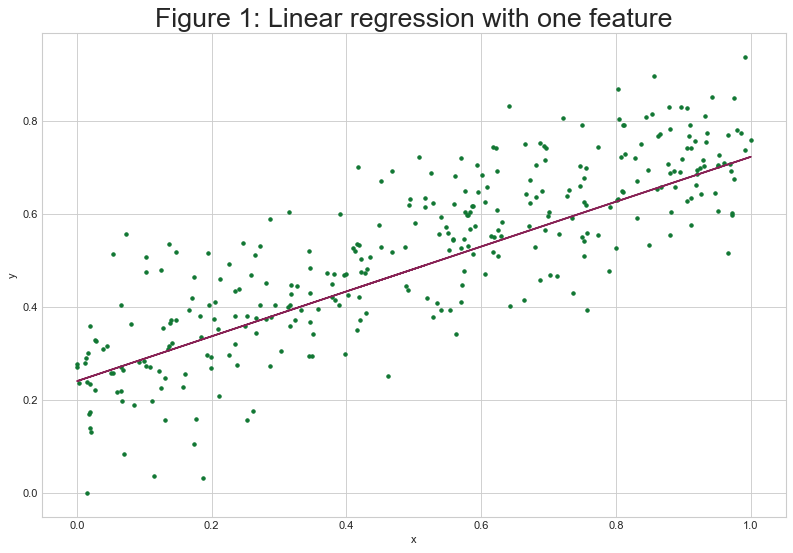

In [383]:
# plotting the given data:

plt.style.use('seaborn-whitegrid')
# Plotting function for model:
def f(x):
 return (w[0] + w[1]*x)
modelPoints = f(xarray) # was xarray
modelPoints = np.ravel(modelPoints.sum(axis=0))

Yarray=(np.squeeze(np.asarray(Y)))
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 1: Linear regression with one feature', size = 24)
plt.scatter(xarray, Yarray, marker='.',color='#117733')
plt.plot(xarray, modelPoints, color = "#882255")

plt.show()

# Mean squared error for training data
The final hypothesis seems to be fitting the scatter plot well.

In [384]:
# Calc error for training-data 2D:
print(len(Y))

def calculateError(weights, X, Y):

    # Need to transpose the weights so that X can be multiplied with X.
    # X needs is a 325x3 matrix, whilst weights is a 3x1 matrix after it is transposed!
    Xw = np.dot(X,weights)

    # Continue with the linear algebra to calculate the error:
    error = (1/len(Y)) * (np.linalg.norm(np.subtract(Xw,Y)))**2
    return error


errorForTrainingData = calculateError(w,X,Y)
if data.shape[1] == 2:
    print("errorForTrainingData1D", errorForTrainingData)
else:
    print(("errorForTrainingData2D", errorForTrainingData))


325
('errorForTrainingData2D', 0.010386850731462317)


In [385]:
def model(w,x):
    return x.dot(w.T)

def mse(w,x,y):
    error = np.mean(np.square(model(w,x)-y))
    return error

# y = np.matrix(Y).T
print(w.shape)
print(X.shape)
print(Y.shape)

# X = X.T
# e_mse = np.mean(((X.dot(w))-Y)**2)
#print(e_mse)

trainingError = mse(w.T,X,Y)

print(error1)

(3, 1)
(325, 3)
(325, 1)
0.013758791126537117


# Loading the test-data with the model


In [386]:
dataTest = np.loadtxt('test_1d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarrayTest = dataTest[...,0] # Need to get this on a matrix-form!
numOfColumns = dataTest.shape[1]

Ytest = dataTest[...,(numOfColumns-1)]
Xtest = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D



In [387]:
Xtest,Ytest, xarrayTest, data, numOfColumns = loadCSV('test_2d_reg_data.csv')

In [388]:
# Updated way of getting the X-matrix!
ones = np.ones(Xtest.shape[0])
Xtest = np.c_[ones,Xtest] # Merge two matrices


## Mean squared error for test-data

In [389]:
# The error for the test-data:
print(w)
print(Ytest)
testError = mse(w.T,Xtest,Ytest)
print(testError)

[[0.24079271]
 [0.48155686]
 [0.0586439 ]]
[[0.43 ]
 [0.288]
 [0.514]
 [0.441]
 [0.528]
 [0.356]
 [0.583]
 [0.46 ]
 [0.536]
 [0.62 ]
 [0.357]
 [0.455]
 [0.734]
 [0.8  ]
 [0.592]
 [0.692]
 [0.844]
 [0.715]
 [1.   ]
 [0.419]
 [0.711]
 [0.753]
 [0.579]
 [0.805]
 [0.274]
 [0.567]
 [0.575]
 [0.443]
 [0.225]
 [0.603]
 [0.357]
 [0.742]
 [0.407]
 [0.854]
 [0.848]
 [0.277]
 [0.51 ]
 [0.698]
 [0.459]
 [0.653]
 [0.643]
 [0.926]
 [0.477]
 [0.423]
 [0.205]
 [0.593]
 [0.44 ]
 [0.3  ]
 [0.696]
 [0.269]
 [0.437]
 [0.801]
 [0.659]
 [0.646]
 [0.321]
 [0.568]
 [0.526]
 [0.773]
 [0.382]
 [0.257]
 [0.358]
 [0.61 ]
 [0.501]
 [0.167]
 [0.394]
 [0.532]
 [0.788]
 [0.5  ]
 [0.457]
 [0.605]
 [0.682]
 [0.501]
 [0.448]
 [0.405]
 [0.613]
 [0.755]
 [0.538]
 [0.338]
 [0.726]
 [0.564]
 [0.742]
 [0.281]
 [0.403]
 [0.34 ]
 [0.439]
 [0.373]
 [0.615]
 [0.705]
 [0.404]
 [0.764]
 [0.61 ]
 [0.651]
 [0.323]
 [0.748]
 [0.53 ]
 [0.227]
 [0.42 ]
 [0.119]
 [0.362]
 [0.362]
 [0.464]
 [0.321]
 [0.619]
 [0.474]
 [0.702]
 [0.574]
 [0

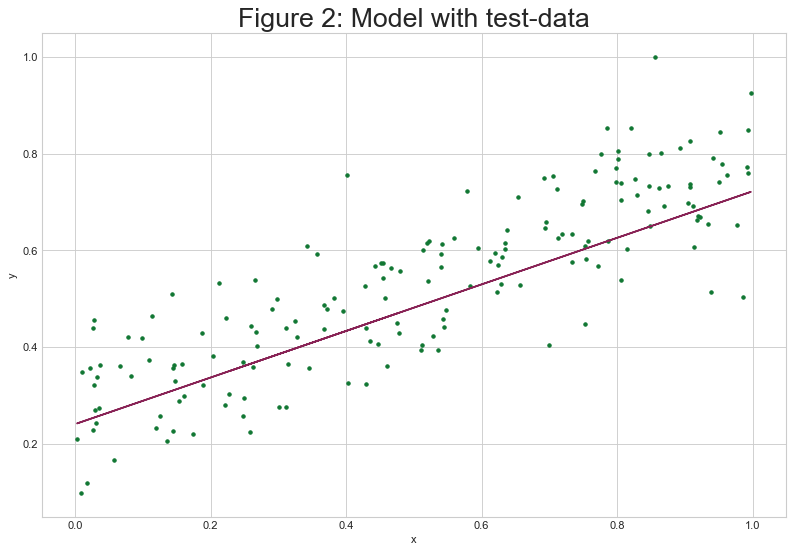

In [390]:
# Plotting the test-data and the model:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0] + w[1]*x)
modelPoints = f(xarrayTest)
modelPoints = np.ravel(modelPoints.sum(axis=0))

YtestArray=(np.squeeze(np.asarray(Ytest)))
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 2: Model with test-data', size = 24)
plt.scatter(xarrayTest, YtestArray, marker='.',color='#117733')
plt.plot(xarrayTest, modelPoints, color = "#882255")

plt.show()

In [391]:
print("1D Weights for training data: ", w)
print("Error for training data: ", trainingError)
print("Error for test data: ", testError)




1D Weights for training data:  [[0.24079271]
 [0.48155686]
 [0.0586439 ]]
Error for training data:  0.010386850731462317
Error for test data:  0.00952976445061891
